In [ ]:
## Colloborative filtering is the process of filtering for
## information or patterns using techniques including collboration
## among multiple agents, viewpoints, data sources, and so on.

## It tries to find people who are similar to each other by looking
## at their tastes. If a person primarily likes action movies,
## and it will try to recommend the one that hasn't been seen
## by the first person, but seen by the second person

## User-based collaborative filtering
## Item-based collaborative filtering

In [1]:
## following dictionary object contains movie user preferences
movie_user_preferences={'Jill': {'Avenger: Age of Ultron': 7.0, 'Django Unchained': 6.5, 'Gone Girl': 9.0, 'Kill the Messenger': 8.0},
                        'Julia': {'Avenger: Age of Ultron': 10.0, 'Django Unchained': 6.0, 'Gone Girl': 6.5, 'Kill the Messenger': 6.0, 'Zoolander': 6.5},
                        'Max': {'Avenger: Age of Ultron': 7.0, 'Django Unchained': 7.0, 'Gone Girl': 10.0, 'Horrible Bosses 2': 6.0, 'Kill the Messenger': 5.0, 'Zoolander': 10.0},
                        'Robert': {'Avenger: Age of Ultron': 8.0, 'Django Unchained': 7.0, 'Horrible Bosses 2': 5.0, 'Kill the Messenger': 9.0, 'Zoolander': 9.0},
                        'Sam': {'Avenger: Age of Ultron': 10.0, 'Django Unchained': 7.5, 'Gone Girl': 6.0, 'Horrible Bosses 2': 3.0, 'Kill the Messenger': 5.5, 'Zoolander': 7.0},
                        'Toby': {'Avenger: Age of Ultron': 8.5, 'Django Unchained': 9.0, 'Zoolander': 2.0},
                        'William': {'Avenger: Age of Ultron': 6.0, 'Django Unchained': 8.0, 'Gone Girl': 7.0, 'Horrible Bosses 2': 4.0, 'Kill the Messenger': 6.5, 'Zoolander': 4.0}}


In [2]:
movie_user_preferences['William']['Gone Girl']

7.0

In [ ]:
#  User-based collaborative filtering
## Finding similar users
##  by comparing each user with every other user
## computing a similarity score
## This similarity score can be computed using
## pearson correlation, Euclidean distance, Manhattan Distance, and so on.

In [11]:
## Euclidean distance score
data = []
for i in movie_user_preferences.keys():
    try:
        data.append(
        (i,
         movie_user_preferences[i]['Django Unchained'],
         movie_user_preferences[i]['Avenger: Age of Ultron']))
    except:
        pass
        

In [12]:
import pandas as pd
df = pd.DataFrame(data=data, columns=['user', 'django', 'avenger'])

In [13]:
df.head()

,user,django,avenger
0,Jill,6.5,7.0
1,Julia,6.0,10.0
2,Max,7.0,7.0
3,Robert,7.0,8.0
4,Sam,7.5,10.0


In [14]:
import matplotlib.pyplot as plt

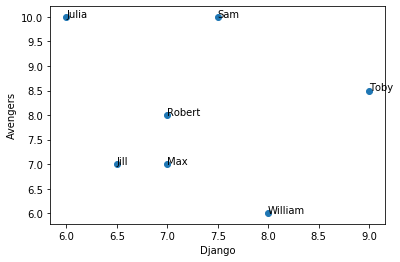

In [15]:
plt.scatter(df.django, df.avenger)
plt.xlabel('Django')
plt.ylabel('Avengers')
for i,txt in enumerate(df.user):
    plt.annotate(txt, (df.django[i],df.avenger[i]))
plt.show()

In [ ]:
## We can see the Jill and Toby are quite far away from each
## other, where as Robert and Max are quite close to each other.

In [17]:
from numpy import sqrt
# Eclidean distance between Jill and Toby rating
sqrt(pow(8.5-7,2)+pow(9-6.5,2))

2.9154759474226504

In [18]:
#Euclidean distance between Robert and Max rating
sqrt(pow(8-7,2)+pow(7-7,2))

1.0

In [19]:
# Similar score = 1/(1+Euclidean Distance)
# similarity score between Robert and Max
1/(1+sqrt(pow(8-7,2)+pow(7-7,2)))

0.5

In [20]:
#Similarity score between Jill and Toby
1/(1+sqrt(pow(8.5-7,2)+pow(9-6.5,2)))

0.2553967929896867

In [23]:
## Lets create a function the calculates the similarity score
## based on the Euclidean distance between two users where all
## all the movies that they watched are taken into consideration

def sim_distance(prefs, person1, person2):
    #Get the list of shared_items
    si={}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item]=1
    ##if they have no ratings in common, return 0
    if len(si)==0:
        return 0
    ##Add up the squares of all the differences
    sum_of_squares=sum([pow(prefs[person1][item]-prefs[person2][item],2) for item in prefs[person1] if item in prefs[person2]])
    return 1/(1+sum_of_squares)

In [24]:
sim_distance(movie_user_preferences, 'Sam','Toby')

0.03278688524590164

In [25]:
## The pearson correlation Score
## using pearson correlation to compute the similarity between 
## two users

def create_movie_user_df(input_data, user1, user2):
    data = []
    for movie in input_data[user1].keys():
        if movie in input_data[user2].keys():
            try:
                data.append((movie,
                            input_data[user1][movie],
                            input_data[user2][movie]))
            except:
                pass
    return pd.DataFrame(data=data, columns=['movie', user1, user2])


In [26]:
df = create_movie_user_df(movie_user_preferences, 'Sam', 'William')
df

,movie,Sam,William
0,Avenger: Age of Ultron,10.0,6.0
1,Django Unchained,7.5,8.0
2,Gone Girl,6.0,7.0
3,Horrible Bosses 2,3.0,4.0
4,Kill the Messenger,5.5,6.5
5,Zoolander,7.0,4.0


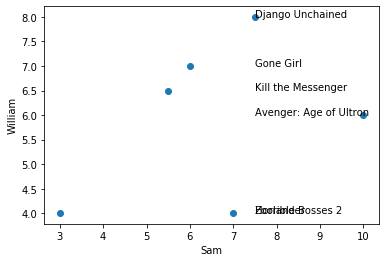

In [27]:
plt.scatter(df.Sam, df.William)
plt.xlabel('Sam')
plt.ylabel('William')
for i, txt in enumerate(df.movie):
    plt.annotate(txt, (df.Sam[1], df.William[i]))
plt.show()

In [29]:
from scipy.stats.stats import pearsonr
pearsonr(df.Sam, df.William)

(0.3706740197017842, 0.4694541326841092)

In [30]:
## Lets see the scatter plot of correlation between Sam and Julia
df = create_movie_user_df(movie_user_preferences, 'Sam', 'Julia')
df

,movie,Sam,Julia
0,Avenger: Age of Ultron,10.0,10.0
1,Django Unchained,7.5,6.0
2,Gone Girl,6.0,6.5
3,Kill the Messenger,5.5,6.0
4,Zoolander,7.0,6.5


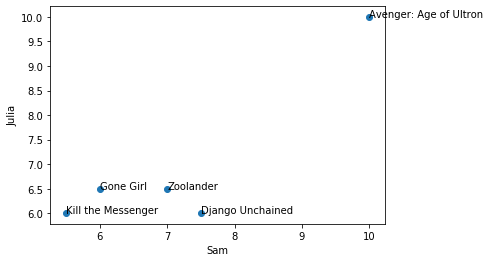

In [31]:
plt.scatter(df.Sam, df.Julia)
plt.xlabel('Sam')
plt.ylabel('Julia')
for i,txt in enumerate(df.movie):
    plt.annotate(txt, (df.Sam[i], df.Julia[i]))
plt.show()

In [32]:
pearsonr(df.Sam, df.Julia)

(0.8828518332602509, 0.0472775070034396)

In [40]:
## create a function that takes in the data and calculates the
## Pearson correlation between the two users

# Returns the pearson correlation coefficient for p1 and p2
def sim_pearson(prefs, p1, p2):
    # Get the list of mutually rated items
    si={}
    for item in prefs[p1]:
        if item in prefs[p2]:
            si[item]=1
    #Find the number of elements
    n=len(si)
    #If they are no ratings in common, return 0
    if n==0:
        return 0
    
    # Add up all the preferences
    sum1 = sum([prefs[p1][it] for it in si])
    sum2 = sum([prefs[p2][it] for it in si])
    
    #sum up the squares
    sum1sq=sum([pow(prefs[p1][it],2) for it in si])
    sum2sq=sum([pow(prefs[p2][it],2) for it in si])
    
    #sum up the products
    pSum = sum([prefs[p1][it]*prefs[p2][it] for it in si])
    
    #calculate pearson score
    num=pSum-(sum1*sum2/n)
    den=sqrt((sum1sq-pow(sum1,2)/n)*(sum2sq-pow(sum2,2)/n))
    if den==0:
        return 0
    
    r=num/den
    
    return r

In [41]:
## lets compute pearson correlation between Sam and Julia
sim_pearson(movie_user_preferences, 'Sam', 'Julia')

0.8828518332602507

In [42]:
# Ranking the users
## Once we have the method of computing the similarity
## between users, we then proceed to rank them based on
## similarity between particular users.

def top_matches(prefs, person, n=5, similarity=sim_pearson):
        scores = [(similarity(prefs, person, other), other)
                 for other in prefs if other!=person]
        #sort the list so the highest scores appear at the top
        scores.sort()
        scores.reverse()
        return scores[0:n]

In [43]:
## Let's see top three people who are similar to Toby:
top_matches(movie_user_preferences, 'Toby', n=3, similarity = sim_distance)

[(0.10526315789473684, 'Jill'),
 (0.08163265306122448, 'William'),
 (0.03278688524590164, 'Sam')]

In [ ]:
## Recommending items
## once you know who is similar to you, you would now like to know the
## movies that are recommended for you. The following image 
## shows how to compute a score for the movies so that
## we can find out what the most recommended movie is:

## We multiply the similarity score by the movie ratings of each use
## We then sum up this new score and then divide it by the applicable similarity score
## In summary, we are taking the weighted average based on the similarity score.

In [49]:
def get_recommendations(prefs, person, similarity=sim_pearson):
    totals={}
    simSums={}
    for other in prefs:
        #don't compare me to myself
        if other==person:
            continue
        sim=similarity(prefs,person,other)
        
        #ignore scores of zero or lower
        if sim<=0:
            continue
        for item in prefs[other]:
            #only score  movies I haven't seen yet
            if item not in prefs[person] or prefs[person][item]==0:
                #Similarity * score
                totals.setdefault(item,0)
                totals[item]+=prefs[other][item]*sim
                #sum of similarities
                simSums.setdefault(item, 0)
                simSums[item]+=sim
        
    #Create the normalized list
    rankings = [(total/simSums[item], item) for item,total in totals.items()]
    #Return the sorted list
    rankings.sort()
    rankings.reverse()
    return rankings

In [50]:
get_recommendations(movie_user_preferences, 'Toby')

[(6.587965809121004, 'Gone Girl'),
 (6.087965809121004, 'Kill the Messenger'),
 (3.608127720528246, 'Horrible Bosses 2')]

In [52]:
get_recommendations(movie_user_preferences, 'Toby', similarity=sim_distance)

[(7.773043918833565, 'Gone Girl'),
 (6.976295282563891, 'Kill the Messenger'),
 (4.093380589669568, 'Horrible Bosses 2')]

In [ ]:
# ITEM based collaborative filtering

In [53]:
def transform_prefs(prefs):
    result={}
    for person in prefs:
        for item in prefs[person]:
            result.setdefault(item,{})
            result[item][person]=prefs[person][item]
    return result

In [ ]:
{'Avenger: Age of Ultron': {'Jill': 7.0,  'Julia': 10.0, 'Max': 7.0, 'Robert': 8.0, 'Sam': 10.0, 'Toby': 8.5, 'William': 6.0}, 'Django Unchained': {'Jill': 6.5, 'Julia': 6.0, 'Max': 7.0, 'Robert': 7.0, 'Sam': 7.5, 'Toby': 9.0, 'William': 8.0}, 'Gone Girl': {'Jill': 9.0, 'Julia': 6.5, 'Max': 10.0, 'Sam': 6.0, 'William': 7.0}, 'Horrible Bosses 2': {'Max': 6.0, 'Robert': 5.0, 'Sam': 3.0,      'William': 4.0}, 'Kill the Messenger': {'Jill': 8.0, 'Julia': 6.0, 'Max': 5.0, 'Robert': 9.0, 'Sam': 5.5, 'William': 6.5}, 'Zoolander': {'Julia': 6.5, 'Max': 10.0, 'Robert': 9.0, 'Sam': 7.0, 'Toby': 2.0, 'William': 4.0}}

In [ ]:
## TBD